#Training OpenAI GTP-2
Copyright 2020, Denis Rothman MIT License. Denis Rothman created the Colab notebook using the OpenAI repository, adding title steps for educational purposes only.

It is important to note that we are running a low-level GPT-2 model and not a one-line call to obtain a result. We are also avoiding pre-packaged versions. We are getting our hands dirty to understand the architecture of a GPT-2 from scratch. You might get some deprecation messages. However, the effort is worthwhile.

***Code References***

[Reference: OpenAI Repository](https://github.com/openai/gpt-2)
The repository was cloned and adapted to N Shepperd's repository.

[Reference: N Shepperd Repository](https://github.com/nshepperd/gpt-2)
The repository was not cloned. N Shepperd's training programs were inserted into the OpenAI Repository. The list of N Shepperd's programs are cited in the 'N Shepperd' section of the notebook. Some programs were modified for educational purposes only to work with this notebook.

***Model Reference Paper***

[Alec Radford, Jeffrey Wu, Rewon Child, David Luan, Dario Amodei, Ilya Sutskever,2019,'Language Models are Unsupervised Multitask Learners'](https://d4mucfpksywv.cloudfront.net/better-language-models/language-models.pdf)


***Step 1: Pre-requisites:***

a) activate GPU in the notebook settings runTime menu <br>
b) Upload the following program files and dset.txt(dataset) with the file manager: train.py,load_dataset.py,encode.py,accumulate,memory_saving_gradients.py,dset.txt

In [7]:
from IPython.display import Image     #This is used for rendering images in the notebook

#Steps 2 to 6: Initial steps of the training process

In [ ]:
#@title Step 2: Cloning the OpenAI GPT-2 Repository 
#!git clone https://github.com/nshepperd/gpt-2.git
!git clone https://github.com/openai/gpt-2.git

Cloning into 'gpt-2'...
remote: Enumerating objects: 233, done.
remote: Total 233 (delta 0), reused 0 (delta 0), pack-reused 233
Receiving objects: 100% (233/233), 4.38 MiB | 7.84 MiB/s, done.
Resolving deltas: 100% (124/124), done.


In [ ]:
#@title Step 3: Installing the requirements
import os                     # when the VM restarts import os necessary
os.chdir("/content/gpt-2")    
!pip3 install -r requirements.txt

     |████████████████████████████████| 92kB 6.0MB/s 
     |████████████████████████████████| 604kB 10.4MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 51kB 9.0MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115943 sha256=e7fc9c87b2d5efd0768028e123e2fb967ad68cbefae7cde100e5d94495ce99ab
  Stored in directory: /root/.cache/pip/wheels/af/19/30/1ea0cad502dcb4e66ed5a690279628c827aea38bbbab75d5ed
  Created wheel for regex: filename=regex-2017.4.5-cp37-cp37m-linux_x86_64.whl size=534399 sha256=f70dd55b248580c4d3285a1c31240958a9cf3be653fc138c4087fd2011464117
  Stored in directory: /root/.cache/pip/wheels/75/07/38/3c16b529d50cb4e0cd3dbc7b75cece8a09c132692c74450b01
Successfully built fire regex
ERROR: spacy 2.2.4 has requirement tqdm<5.0.0,>=4.38.0, but you'll have tqdm 4.31.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but

In [ ]:
!pip install toposort

In [ ]:
#@title Step 4: Checking TensorFlow version 
#Colab has tf 1.x and tf 2.x installed
#Restart runtime using 'Runtime' -> 'Restart runtime...'
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [ ]:
#@title Step 5: Downloading 117M parameter GPT-2 Model
# run code and send argument
import os # after runtime is restarted
os.chdir("/content/gpt-2")
!python3 download_model.py '117M' #creates model directory

Fetching checkpoint: 1.00kit [00:00, 1.19Mit/s]                                                     
Fetching encoder.json: 1.04Mit [00:00, 2.95Mit/s]                                                   
Fetching hparams.json: 1.00kit [00:00, 1.03Mit/s]                                                   
Fetching model.ckpt.data-00000-of-00001: 498Mit [00:17, 28.3Mit/s]                                  
Fetching model.ckpt.index: 6.00kit [00:00, 6.01Mit/s]                                               
Fetching model.ckpt.meta: 472kit [00:00, 1.78Mit/s]                                                 
Fetching vocab.bpe: 457kit [00:00, 1.81Mit/s]                                                       


In [ ]:
#@title Step 6: Copying the Project Resources to scr
!cp /content/dset.txt /content/gpt-2/src/
!cp -r /content/gpt-2/models/ /content/gpt-2/src/

#Step 7: The N Shepperd training files

In [ ]:
#@title Step 7: Copying the N Shepperd Training Files
#Referfence GitHub repository: https://github.com/nshepperd/gpt-2
import os # import after runtime is restarted
!cp /content/train.py /content/gpt-2/src/
!cp /content/load_dataset.py /content/gpt-2/src/
!cp /content/encode.py /content/gpt-2/src/
!cp /content/accumulate.py /content/gpt-2/src/
!cp /content/memory_saving_gradients.py /content/gpt-2/src/

#Step 8: Encoding the dataset

In [ ]:
#@title Step 8:Encoding dataset
import os # import after runtime is restarted
os.chdir("/content/gpt-2/src/")
model_name="117M"
!python /content/gpt-2/src/encode.py dset.txt out.npz 

Reading files
100% 1/1 [00:10<00:00, 10.06s/it]
Writing out.npz


#Step 9: Training a GPT-2 model
import os # import after runtime is restarted
os.chdir("/content/gpt-2/src/")
!python train.py --dataset out.npz

import os # import after runtime is restarted
os.chdir("/content/gpt-2/src/")
!python train.py --dataset out.npz

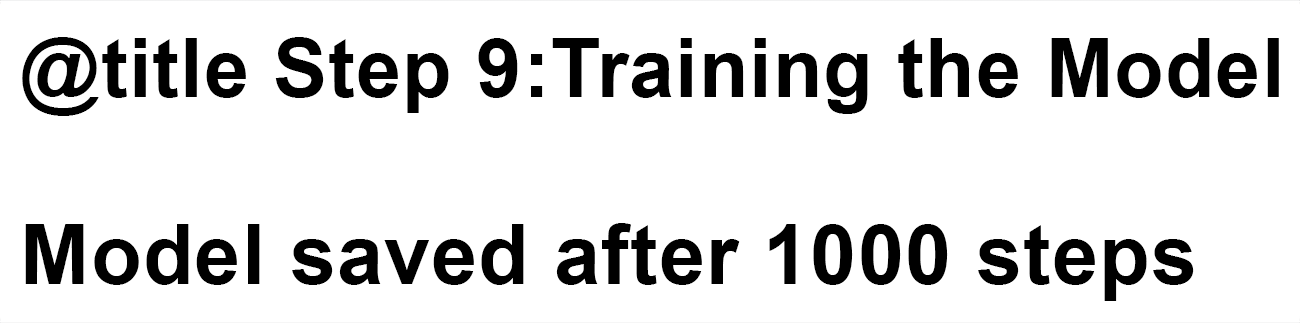

In [9]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/AppIV/B17948_Appendix%20IV_01.PNG', width=400) #This is used for rendering images in the notebook

In [ ]:
#@title Step 9:Training the Model
#Model saved after 1000 steps
import os # import after runtime is restarted
os.chdir("/content/gpt-2/src/")
!python train.py --dataset out.npz

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




2021-06-17 09:50:58.181502: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX512F
2021-06-17 09:50:58.191275: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000194999 Hz
2021-06-17 09:50:58.191578: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5613f34ef480 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-06-17 09:50:58.191613: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-06-17 09:50:58.195

#Step 10: Creating a training model directory

In [ ]:
#@title Step 10: Creating a Training Model directory
#Creating a Training Model directory named 'tgmodel'
import os
run_dir = '/content/gpt-2/models/tgmodel'
if not os.path.exists(run_dir):
  os.makedirs(run_dir)

In [ ]:
#@title Step 10A: Copying training Files
!cp /content/gpt-2/src/checkpoint/run1/model-1000.data-00000-of-00001 /content/gpt-2/models/tgmodel
!cp /content/gpt-2/src/checkpoint/run1/checkpoint /content/gpt-2/models/tgmodel
!cp /content/gpt-2/src/checkpoint/run1/model-1000.index /content/gpt-2/models/tgmodel
!cp /content/gpt-2/src/checkpoint/run1/model-1000.meta /content/gpt-2/models/tgmodel

In [ ]:
#@title Step 10B: Copying the OpenAI GPT-2 117M Model files
!cp /content/gpt-2/models/117M/encoder.json /content/gpt-2/models/tgmodel
!cp /content/gpt-2/models/117M/hparams.json /content/gpt-2/models/tgmodel
!cp /content/gpt-2/models/117M/vocab.bpe /content/gpt-2/models/tgmodel

In [ ]:
#@title Step 10C: Renaming the model directories
import os
!mv /content/gpt-2/models/117M  /content/gpt-2/models/117M_OpenAI
!mv /content/gpt-2/models/tgmodel  /content/gpt-2/models/117M

#Step 11: Generating unconditional samples
import os # import after runtime is restarted
os.chdir("/content/gpt-2/src")
!python generate_unconditional_samples.py --model_name '117M'

In [ ]:
import os # import after runtime is restarted
os.chdir("/content/gpt-2/src")
!python generate_unconditional_samples.py --model_name '117M'

======================================== SAMPLE 4 ========================================
Malcolm Turnbull has slammed a plan to bar most union members from working on technology that effectively targets her interest in data protection under one of her stinging dismissal letters to the federal unions.

Labor failures and signs of change feel 'disgusting' after two Liberal MPs critical of Abbott's digital privacy policy send denials campaign

Zaharie Leonhardt (left) and Michael Hoy (right) reportedly received comments about the reform from the HSL. Photo: WAYNE HENRY Melbourne minister, Mumta Serena, says requests to remove Palmer voted against by 22 to 16 votes. The salary cap for politicians are set to rise to $13,000 by 2017 after government-appointed director Sally Critchuk's move came under intense pressure in her summer and fall term. Labor had offered to leave Victorian election campaign worker Grant Smith for a seat on the triple ABC review committee after five of his colleagu

#Step 12: Interactive context and completion examples

In [ ]:
#@title Step 12: Interactive Context and Completion Examples
import os # import after runtime is restarted
os.chdir("/content/gpt-2/src")
!python interactive_conditional_samples.py --temperature 0.8 --top_k 40 --model_name '117M'


2021-06-17 10:13:24.531482: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-06-17 10:13:24.558429: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-17 10:13:24.559022: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2021-06-17 10:13:24.559380: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-06-17 10:13:24.561035: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-06-17 10:13:24.562597: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2021